<a href="https://colab.research.google.com/github/mvoassis/default_forecasting_fintech/blob/main/notebooks/Model_Fintech_Default_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Model - Fintech Default Classification
Marcos Oliveira (mvoassis@gmail.com)

Data (features):

* clean_data_full.csv (all data features)
* clean_data_13f.csv (13 most relevant features)

## Loading libs and Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Better outcomes achieved with Full feature data

data = pd.read_csv('https://github.com/mvoassis/default_forecasting_fintech/blob/main/clean_data_full.csv?raw=true') # clean_data_full.csv <- Better outcomes

# data = pd.read_csv('https://github.com/mvoassis/default_forecasting_fintech/blob/main/clean_data_13f.csv?raw=true') # clean_data_13f.csv

In [3]:
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,Other,Own,...,Homeimprovement,Medical,Personal,Venture,B,C,D,E,F,G
0,37.0,51000.0,3.0,12800.0,12.84,0.0,0.25,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,33.0,58000.0,5.0,6400.0,7.51,0.0,0.11,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24.0,9600.0,3.0,1300.0,12.73,1.0,0.14,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33.0,14400.0,0.0,2000.0,14.79,0.0,0.14,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,78000.0,0.0,19500.0,15.31,1.0,0.25,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']

## Separating a validation dataset

Before starting the classification model, first the data should be balanced, normalized, and divided into:

* Training set
* Testing set
* Validation set

The validation set should be saved before the balancing process, which should be applied only on the training data. 

Saving X_val and y_val for later...

In [5]:
from sklearn.model_selection import train_test_split

X_train_test, X_val, y_train_test, y_val = train_test_split(X,y, test_size=0.2, stratify=y)

print('Train and test: ',X_train_test.shape[0],'rows (80%)')
print('Validation: ',X_val.shape[0],'rows (20%)')

Train and test:  22916 rows (80%)
Validation:  5730 rows (20%)


## Balancing training data

Three approaches could be tested for data balancing:

1. Upsampling - Resampling minority class, replicating rows to the size of the majoroty class. (Could lead to overfit)

2. Downsampling - Resampling majoroty class, replicating rows to the size of the minority class. (Could lead to underfit)

3. Hybrid approach - A misxture of approaches 1 and 2. 

---



In [6]:
y_train_test.value_counts(normalize=True)

0.0    0.783383
1.0    0.216617
Name: loan_status, dtype: float64

In [7]:
y_train_test.value_counts()

0.0    17952
1.0     4964
Name: loan_status, dtype: int64

---

> Approach 1: Upsampling

In [8]:
from sklearn.utils import resample

data_train_test = X_train_test
data_train_test['loan_status'] = y_train_test

is_normal = data_train_test['loan_status']==0
normal = data_train_test[is_normal]
default = data_train_test[~is_normal]

sizeUpSample = len(normal) 

# upsampling majority

data_reduced = resample(default,
                        replace = True,             # sample with replacement
                        n_samples = sizeUpSample, # match majority n
                        random_state = 42)          # reproducible results

data_train_test_up = pd.concat([normal, data_reduced])
data_train_test_up['loan_status'].value_counts()

0.0    17952
1.0    17952
Name: loan_status, dtype: int64

---

> Approach 2: Downsampling

In [9]:
from sklearn.utils import resample

data_train_test = X_train_test
data_train_test['loan_status'] = y_train_test

is_normal = data_train_test['loan_status']==0
normal = data_train_test[is_normal]
default = data_train_test[~is_normal]

sizeDownSample = len(default) 

# downsampling minority

data_reduced = resample(normal,
                        replace = False,            # sample with replacement
                        n_samples = sizeDownSample, # match minority n
                        random_state = 42)          # reproducible results

data_train_test_down = pd.concat([data_reduced, default])
data_train_test_down['loan_status'].value_counts()

0.0    4964
1.0    4964
Name: loan_status, dtype: int64

---

> Approach 3: Hybrid

* 50% downsample
* Than upsample to equilize

In [10]:
from sklearn.utils import resample

data_train_test = X_train_test
data_train_test['loan_status'] = y_train_test

is_normal = data_train_test['loan_status']==0
normal = data_train_test[is_normal]
default = data_train_test[~is_normal]

sizeDownSample = len(default) 

# downsampling minority

normal_reduced = resample(normal,
                        replace = False,            # sample with replacement
                        n_samples = int(len(normal)/2), # match minority n
                        random_state = 42)          # reproducible results

default_increased = resample(default,
                        replace = True,                   # sample with replacement
                        n_samples = len(normal_reduced),  # match minority n
                        random_state = 42)                # reproducible results

data_train_test_hyb = pd.concat([normal_reduced, default_increased])
data_train_test_hyb['loan_status'].value_counts()

0.0    8976
1.0    8976
Name: loan_status, dtype: int64

---

**Balanced output variables:**

* data_train_test_up - Approach 1
* data_train_test_down - Approach 2
* data_train_test_hyb - Approach 3

## Normalizing data

To improve the performance of ML methods, lets normalize data using standardscaler.

In [11]:
# Upsampling presented better outcomes

X_train_test = data_train_test_up.drop('loan_status',axis=1)      # upsampling
y_train_test = data_train_test_up['loan_status']

# X_train_test = data_train_test_down.drop('loan_status',axis=1)  # downsampling
# y_train_test = data_train_test_down['loan_status']

# X_train_test = data_train_test_hyb.drop('loan_status',axis=1)   # hybrid
# y_train_test = data_train_test_hyb['loan_status']


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_test)
X_train_test_norm = scaler.transform(X_train_test)
X_val = scaler.transform(X_val)


## Train / Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test_norm,y_train_test, test_size=0.3, stratify=y_train_test, shuffle=True)

print('Train: ',X_train.shape[0],'rows (70%)')
print('Test: ',X_test.shape[0],'rows (30%)')


Train:  25132 rows (70%)
Test:  10772 rows (30%)


# Model Testing

1. Decision Tree
2. Random Forest (RF)
3. Deep Neural Network
4. Hist Gradient Boosting (HGB)
5. Bagging Classification
6. Voting Classification (RF+HGB+Bagging)

---



## **Decision Tree:**

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold


SEED = 42
np.random.seed(SEED)
DTree = DecisionTreeClassifier()

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(DTree, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  95.2 %
STD:  0.0027
Interval with 95% of confidence [94.66, 95.75]


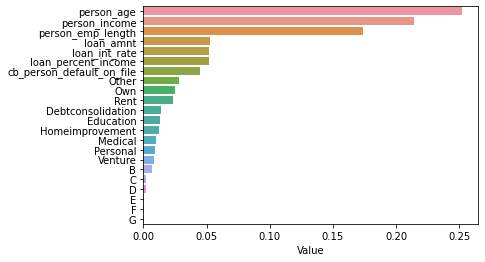

In [15]:
DTree.fit(X_train,y_train)
DTree.feature_importances_

feature_importances = pd.DataFrame(index=X.columns)
feature_importances['Value'] = DTree.feature_importances_

feature_importances.sort_values(by='Value', ascending=False)
sns.barplot(data=feature_importances.sort_values(by='Value', ascending=False), x='Value', y=feature_importances.index)

> Some Results using test data:

<Figure size 576x1296 with 0 Axes>

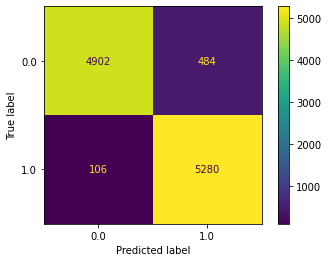

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DTree.fit(X_train,y_train)
DTree_pred = DTree.predict(X_test)

cm = confusion_matrix(y_test, DTree_pred, labels=DTree.classes_ ) #, normalize='all')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=DTree.classes_)
plt.figure(figsize=(8,18))
disp.plot()

plt.show()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,DTree_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      5386
         1.0       0.92      0.98      0.95      5386

    accuracy                           0.95     10772
   macro avg       0.95      0.95      0.95     10772
weighted avg       0.95      0.95      0.95     10772



ROC AUC score =  0.9452283698477534


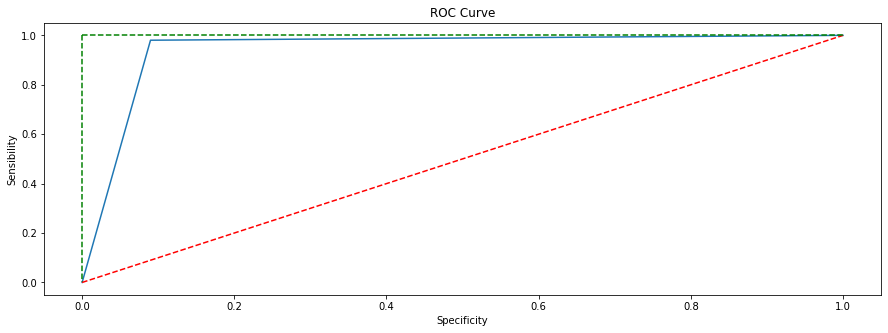

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_pred = DTree.predict_proba(X_test)[:,1]

# tfp - taxa de falsos positivos
# tvp - taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_pred)
print('ROC AUC score = ', roc_auc_score(y_test, prob_pred))

plt.subplots(1, figsize=(15,5))
plt.title('ROC Curve')
plt.plot(tfp, tvp)
plt.xlabel('Specificity')
plt.ylabel('Sensibility')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

**Summary**:

* ROC AUC: 0.9394
* Accuracy: 0.94
* F-measure: 0.94

## **Random Forest:**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)
RForest = RandomForestClassifier()

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(RForest, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  98.4 %
STD:  0.0018
Interval with 95% of confidence [98.05, 98.75]


> Some Results using test data:

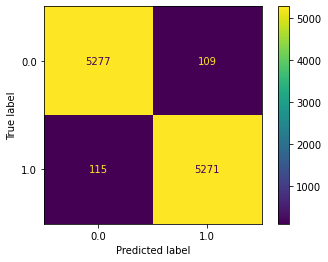

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

RForest.fit(X_train,y_train)
RForest_pred = RForest.predict(X_test)

cm = confusion_matrix(y_test, RForest_pred, labels=RForest.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=RForest.classes_)
disp.plot()
plt.show()

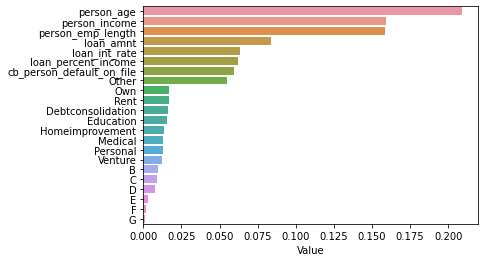

In [77]:
feature_importances = pd.DataFrame(index=X.columns)
feature_importances['Value'] = RForest.feature_importances_

feature_importances.sort_values(by='Value', ascending=False)
sns.barplot(data=feature_importances.sort_values(by='Value', ascending=False), x='Value', y=feature_importances.index)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,RForest_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5386
         1.0       0.98      0.98      0.98      5386

    accuracy                           0.98     10772
   macro avg       0.98      0.98      0.98     10772
weighted avg       0.98      0.98      0.98     10772



ROC AUC score =  0.9948242434863999


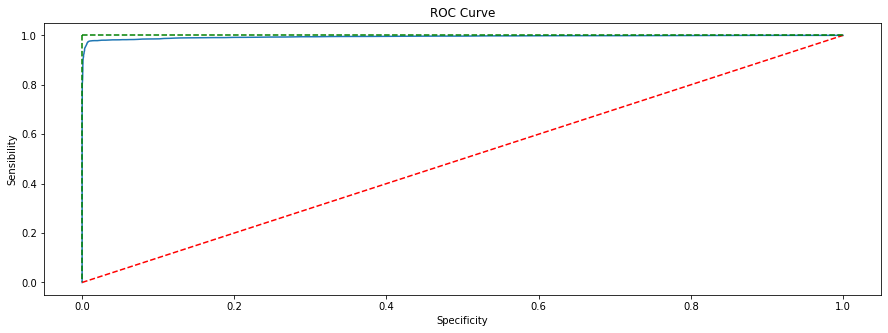

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_pred = RForest.predict_proba(X_test)[:,1]

# tfp - taxa de falsos positivos
# tvp - taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_pred)
print('ROC AUC score = ', roc_auc_score(y_test, prob_pred))

plt.subplots(1, figsize=(15,5))
plt.title('ROC Curve')
plt.plot(tfp, tvp)
plt.xlabel('Specificity')
plt.ylabel('Sensibility')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

**Summary**:

* ROC AUC: 0.9924
* Accuracy: 0.97
* F-measure: 0.97

## **Hist Gradient Boosting**

In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)
HGB = HistGradientBoostingClassifier()

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(HGB, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  89.95 %
STD:  0.0024
Interval with 95% of confidence [89.47, 90.42]


> Some Results using test data:

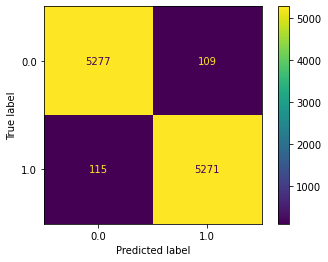

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

HGB.fit(X_train,y_train)
HGB_pred = RForest.predict(X_test)

cm = confusion_matrix(y_test, HGB_pred, labels=HGB.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=HGB.classes_)
disp.plot()
plt.show()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,HGB_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5386
         1.0       0.98      0.98      0.98      5386

    accuracy                           0.98     10772
   macro avg       0.98      0.98      0.98     10772
weighted avg       0.98      0.98      0.98     10772



ROC AUC score =  0.971019524426147


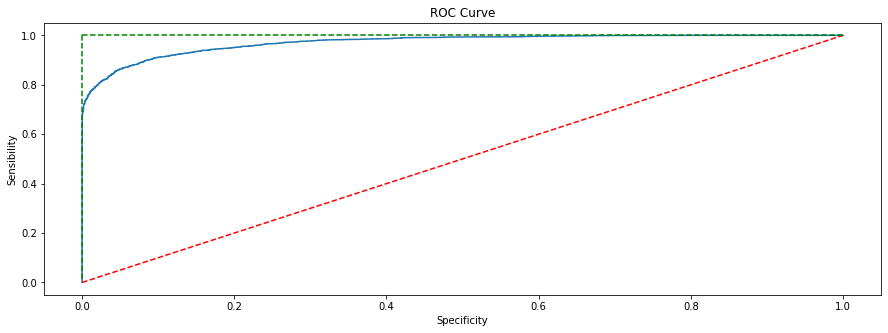

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_pred = HGB.predict_proba(X_test)[:,1]

# tfp - taxa de falsos positivos
# tvp - taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_pred)
print('ROC AUC score = ', roc_auc_score(y_test, prob_pred))

plt.subplots(1, figsize=(15,5))
plt.title('ROC Curve')
plt.plot(tfp, tvp)
plt.xlabel('Specificity')
plt.ylabel('Sensibility')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

## **Deep Neural Network:**

In [27]:
X_train_test_norm.shape

(35904, 22)

In [28]:
import tensorflow
from tensorflow import keras


model = keras.Sequential([
    keras.Input(shape=(X_train_test_norm.shape[1])), #24 ou 18
    keras.layers.Dense(128, activation = tensorflow.nn.relu), 
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # keras.layers.Dense(64, activation = tensorflow.nn.relu),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = tensorflow.nn.sigmoid)

])

# adam = keras.optimizers.Adam(learning_rate=0.002)

cb = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
             keras.callbacks.ModelCheckpoint( filepath='best_model.hdf5',
                                             monitor='val_loss',
                                             save_best_only=True,
                                             patience=5)
             ]

model.compile(optimizer = 'Adam', 
              loss= 'binary_crossentropy',
              metrics=['accuracy']
              )

hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), verbose=0 ) #, callbacks=cb)

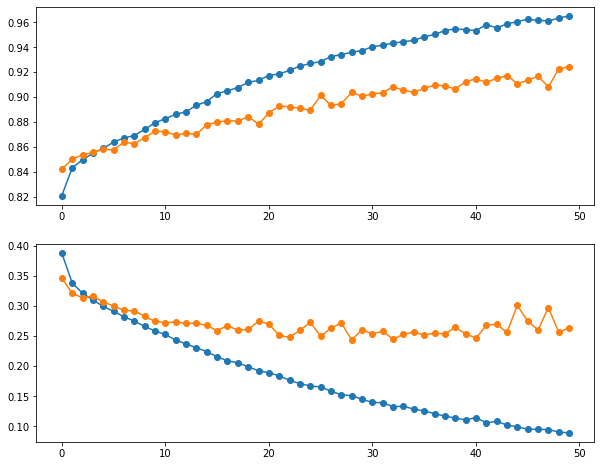

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'], marker='o')
plt.plot(hist.history['val_accuracy'], marker='o')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'], marker='o')
plt.plot(hist.history['val_loss'], marker='o')

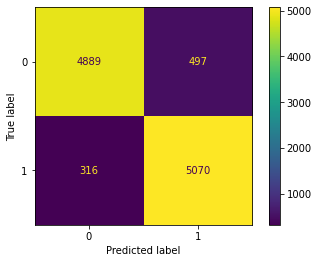

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

DNN_pred = np.round(model.predict(X_test))

cm = confusion_matrix(y_test, DNN_pred, labels=np.array([0,1]))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array([0,1]))
disp.plot()
plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,DNN_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      5386
         1.0       0.91      0.94      0.93      5386

    accuracy                           0.92     10772
   macro avg       0.93      0.92      0.92     10772
weighted avg       0.93      0.92      0.92     10772



ROC AUC score =  0.9759361716620596


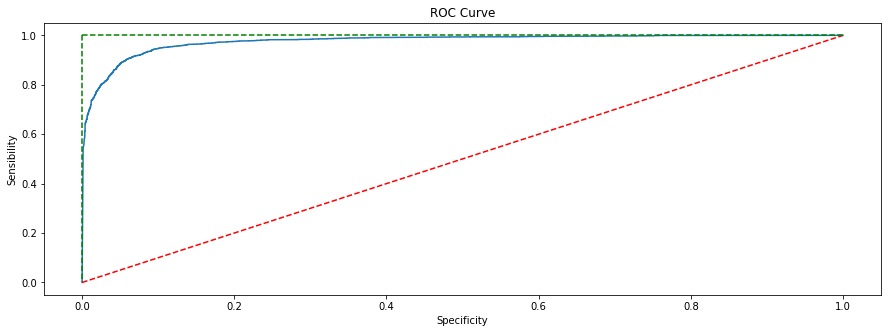

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_pred = model.predict(X_test)

# tfp - taxa de falsos positivos
# tvp - taxa de verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_pred)
print('ROC AUC score = ', roc_auc_score(y_test, prob_pred))

plt.subplots(1, figsize=(15,5))
plt.title('ROC Curve')
plt.plot(tfp, tvp)
plt.xlabel('Specificity')
plt.ylabel('Sensibility')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

**Summary**:

* ROC AUC: 0.9790
* Accuracy: 0.95
* F-measure: 0.95

## **Bagging Classifier**

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)

bag = BaggingClassifier()

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(bag, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  97.53 %
STD:  0.0013
Interval with 95% of confidence [97.26, 97.79]


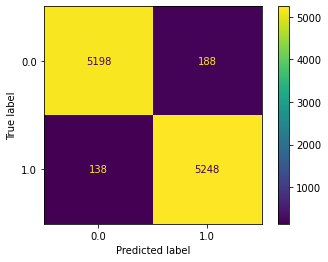

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

bag.fit(X_train,y_train)
bag_pred = bag.predict(X_test)

cm = confusion_matrix(y_test, bag_pred, labels=bag.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=bag.classes_)
disp.plot()
plt.show()

## **Voting (RF + HGB + Bagging)**

In [35]:
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)
HGB_vot = HistGradientBoostingClassifier()
rf_vot = RandomForestClassifier()
bag_vot = BaggingClassifier()

voting = VotingClassifier(estimators=[('rf', rf_vot), ('hgb', HGB_vot), ('bag',bag_vot)], 
                          voting='soft')

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(voting, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  97.98 %
STD:  0.0014
Interval with 95% of confidence [97.70, 98.27]


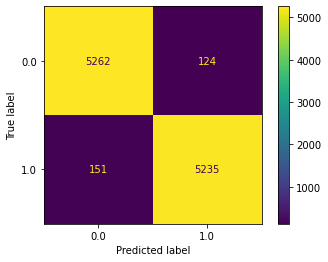

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

cm = confusion_matrix(y_test, voting_pred, labels=voting.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=voting.classes_)
disp.plot()
plt.show()

# Evaluating methods with validation Data 

* X_val
* y_val

## Confusion Matrix

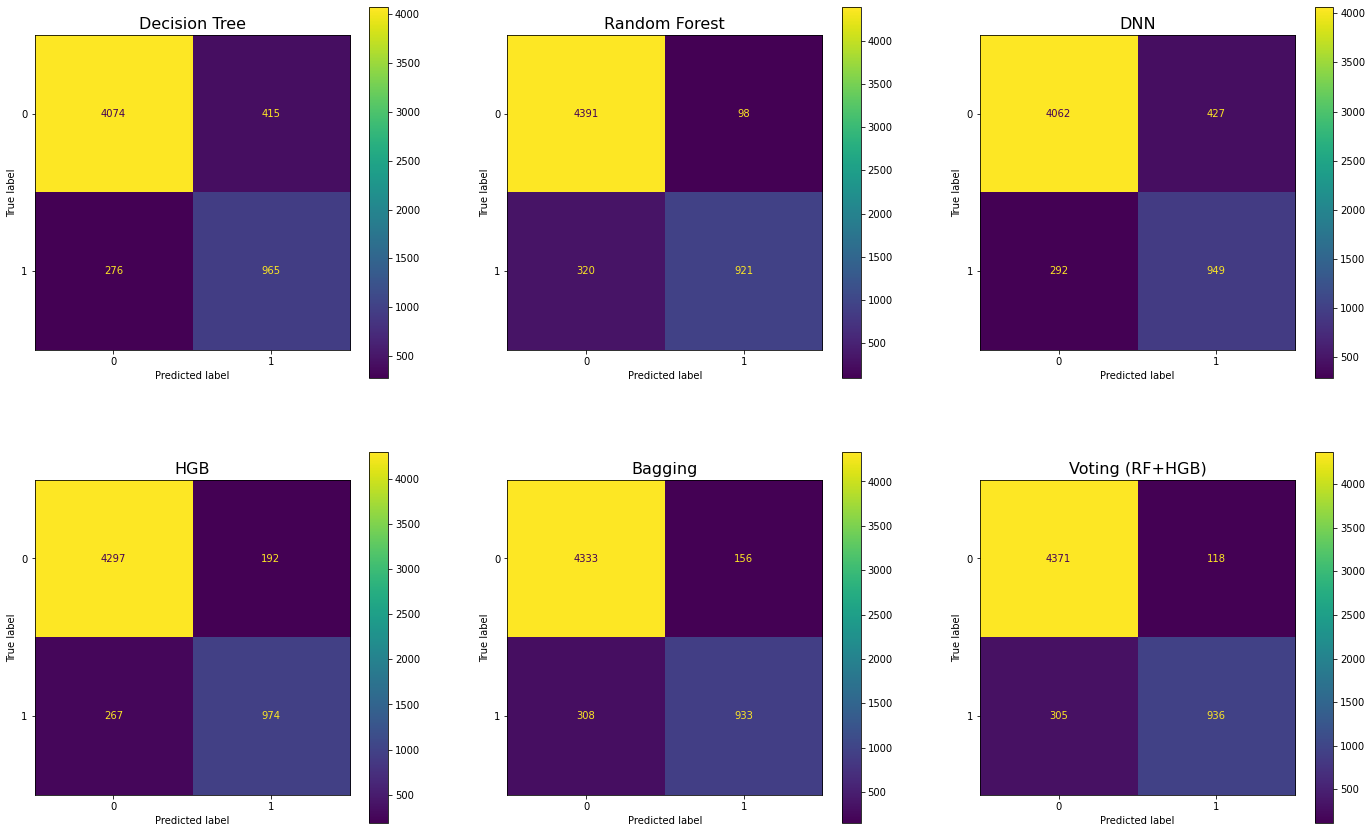

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure(figsize=(24,15))
ax = fig.add_subplot(2,3,1)
ax.set_title('Decision Tree', fontsize=16)
ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Random Forest', fontsize=16)
ax3 = fig.add_subplot(2,3,3)
ax3.set_title('DNN', fontsize=16)
ax4 = fig.add_subplot(2,3,4)
ax4.set_title('HGB', fontsize=16)
ax5 = fig.add_subplot(2,3,5)
ax5.set_title('Bagging', fontsize=16)
ax6 = fig.add_subplot(2,3,6)
ax6.set_title('Voting (RF+HGB)', fontsize=16)

DTree_pred_val = DTree.predict(X_val)
RForest_pred_val = RForest.predict(X_val)
DNN_pred_val = np.round(model.predict(X_val))
HGB_pred_val = HGB.predict(X_val)
bag_pred_val = bag.predict(X_val)
voting_pred_val = voting.predict(X_val)

cm = confusion_matrix(y_val, DTree_pred_val, labels=np.array([0,1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array([0,1]))

cm2 = confusion_matrix(y_val, RForest_pred_val, labels=np.array([0,1]))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=np.array([0,1]))

cm3 = confusion_matrix(y_val, DNN_pred_val, labels=np.array([0,1]))
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                               display_labels=np.array([0,1]))

cm4 = confusion_matrix(y_val, HGB_pred_val, labels=np.array([0,1]))
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                               display_labels=np.array([0,1]))

cm5 = confusion_matrix(y_val, bag_pred_val, labels=np.array([0,1]))
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,
                               display_labels=np.array([0,1]))

cm6 = confusion_matrix(y_val, voting_pred_val, labels=np.array([0,1]))
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6,
                               display_labels=np.array([0,1]))

disp.plot(ax=ax)
disp2.plot(ax=ax2)
disp3.plot(ax=ax3)
disp4.plot(ax=ax4)
disp5.plot(ax=ax5)
disp6.plot(ax=ax6)
plt.show()

## Classification Metrics

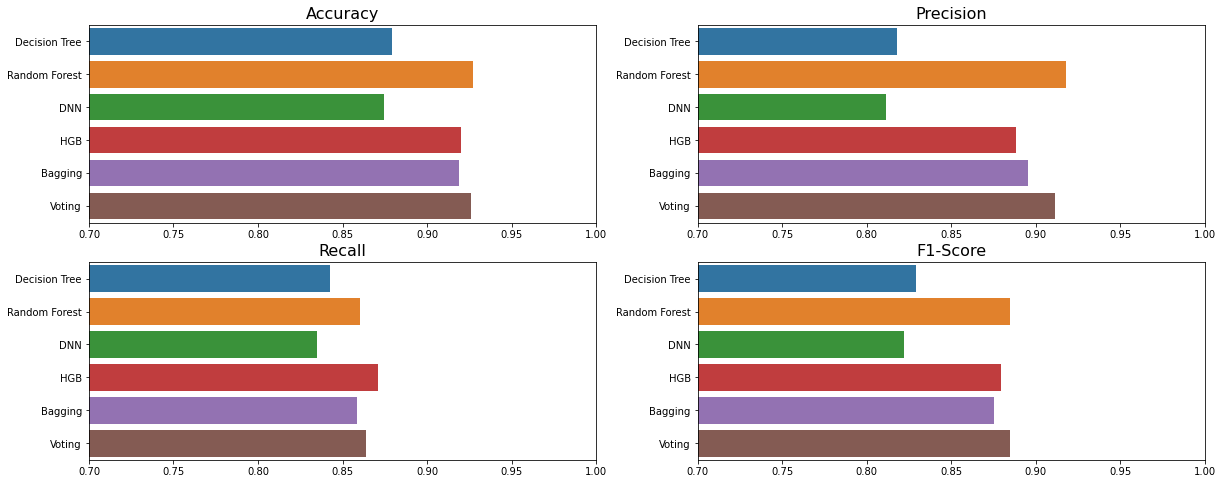

In [38]:
def get_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).T
    # df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

def insert_value_df(df, metric, method1, method2, method3, method4, method5, method6):
  dic = {'Metric': metric, 
         'Decision Tree':method1, 
         'Random Forest':method2, 
         'DNN':method3,
         'HGB':method4,
         'Bagging': method5,
         'Voting': method6}
  df = df.append(dic, ignore_index=True)
  return df


DTree_metrics = get_classification_report(y_val,DTree_pred_val)
RForest_metrics = get_classification_report(y_val,RForest_pred_val)
DNN_metrics = get_classification_report(y_val,DNN_pred_val)
HGB_metrics = get_classification_report(y_val,HGB_pred_val)
bag_metrics = get_classification_report(y_val,bag_pred_val)
voting_metrics = get_classification_report(y_val,voting_pred_val)

metrics = pd.DataFrame(columns=['Metric', 'Decision Tree', 'Random Forest', 'DNN', 'HGB', 'Bagging', 'Voting'])
metrics = insert_value_df(metrics,'Accuracy',
                          DTree_metrics.loc['accuracy']['f1-score'],
                          RForest_metrics.loc['accuracy']['f1-score'],
                          DNN_metrics.loc['accuracy']['f1-score'],
                          HGB_metrics.loc['accuracy']['f1-score'],
                          bag_metrics.loc['accuracy']['f1-score'],
                          voting_metrics.loc['accuracy']['f1-score'])

metrics = insert_value_df(metrics,'Precision',
                          DTree_metrics.loc['macro avg']['precision'],
                          RForest_metrics.loc['macro avg']['precision'],
                          DNN_metrics.loc['macro avg']['precision'],
                          HGB_metrics.loc['macro avg']['precision'],
                          bag_metrics.loc['macro avg']['precision'],
                          voting_metrics.loc['macro avg']['precision'])

metrics = insert_value_df(metrics,'Recall',
                          DTree_metrics.loc['macro avg']['recall'],
                          RForest_metrics.loc['macro avg']['recall'],
                          DNN_metrics.loc['macro avg']['recall'],
                          HGB_metrics.loc['macro avg']['recall'],
                          bag_metrics.loc['macro avg']['recall'],
                          voting_metrics.loc['macro avg']['recall'])

metrics = insert_value_df(metrics,'F1-score',
                          DTree_metrics.loc['macro avg']['f1-score'],
                          RForest_metrics.loc['macro avg']['f1-score'],
                          DNN_metrics.loc['macro avg']['f1-score'],
                          HGB_metrics.loc['macro avg']['f1-score'],
                          bag_metrics.loc['macro avg']['f1-score'],
                          voting_metrics.loc['macro avg']['f1-score'])

metrics = metrics.set_index('Metric')
metrics = metrics.T


plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.xlim(0.7,1)
sns.barplot(data = metrics, y= metrics.index, x='Accuracy')
plt.title('Accuracy', fontsize=16)
plt.xlabel('')

plt.subplot(2,2,2)
plt.xlim(0.7,1)
sns.barplot(data = metrics, y= metrics.index, x='Precision')
plt.title('Precision', fontsize=16)
plt.xlabel('')

plt.subplot(2,2,3)
plt.xlim(0.7,1)
sns.barplot(data = metrics, y= metrics.index, x='Recall')
plt.title('Recall', fontsize=16)
plt.xlabel('')

plt.subplot(2,2,4)
plt.xlim(0.7,1)
sns.barplot(data = metrics, y= metrics.index, x='F1-score')
plt.title('F1-Score', fontsize=16)
plt.xlabel('')

# plt.show()

plt.savefig('all_features_upsamp.png')




## ROC Curve

ROC AUC score:
Decision Tree = 	 0.8425752519948037
Random Forest = 	 0.9314302900688924
DNN = 			 0.9026388975899364
HGB = 			 0.9427785603235701
Bagging = 		 0.9206232299601014
Voting (RF+HGB+Bag) =	 0.939350716560438


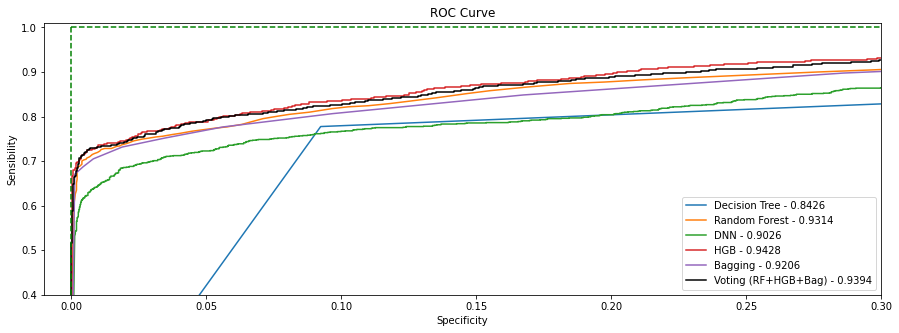

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

dnn_pred = model.predict(X_val)
rf_pred = RForest.predict_proba(X_val)[:,1]
dt_pred = DTree.predict_proba(X_val)[:,1]
hgb_pred = HGB.predict_proba(X_val)[:,1]
bag_pred = bag.predict_proba(X_val)[:,1]
voting_pred = voting.predict_proba(X_val)[:,1]

# tfp - taxa de falsos positivos
# tvp - taxa de verdadeiros positivos


print('ROC AUC score:')
dt_tfp, dt_tvp, limite = roc_curve(y_val, dt_pred)
print('Decision Tree = \t', roc_auc_score(y_val, dt_pred))

rf_tfp, rf_tvp, limite = roc_curve(y_val, rf_pred)
print('Random Forest = \t', roc_auc_score(y_val, rf_pred))

dnn_tfp, dnn_tvp, limite = roc_curve(y_val, dnn_pred)
print('DNN = \t\t\t', roc_auc_score(y_val, dnn_pred))

hgb_tfp, hgb_tvp, limite = roc_curve(y_val, hgb_pred)
print('HGB = \t\t\t', roc_auc_score(y_val, hgb_pred))

bag_tfp, bag_tvp, limite = roc_curve(y_val, bag_pred)
print('Bagging = \t\t', roc_auc_score(y_val, bag_pred))

voting_tfp, voting_tvp, limite = roc_curve(y_val, voting_pred)
print('Voting (RF+HGB+Bag) =\t', roc_auc_score(y_val, voting_pred))

plt.subplots(1, figsize=(15,5))
plt.title('ROC Curve')
plt.plot(dt_tfp, dt_tvp)
plt.plot(rf_tfp, rf_tvp)
plt.plot(dnn_tfp, dnn_tvp)
plt.plot(hgb_tfp, hgb_tvp)
plt.plot(bag_tfp, bag_tvp)
plt.plot(voting_tfp, voting_tvp, color='k')
plt.legend([f'Decision Tree - {np.round(roc_auc_score(y_val, dt_pred),4)}',
            f'Random Forest - {np.round(roc_auc_score(y_val, rf_pred),4)}',
            f'DNN - {np.round(roc_auc_score(y_val, dnn_pred),4)}',
            f'HGB - {np.round(roc_auc_score(y_val, hgb_pred),4)}',
            f'Bagging - {np.round(roc_auc_score(y_val, bag_pred),4)}',
            f'Voting (RF+HGB+Bag) - {np.round(roc_auc_score(y_val, voting_pred),4)}'])
plt.xlabel('Specificity')
plt.ylabel('Sensibility')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.xlim(-0.01,0.3)
plt.ylim(0.4,1.01)

plt.savefig('roc_all_features_upsamp.png')

# Hyperparameter Optimization

Since Voting method achieved the better outcomes, let's try to improve the results of RF, HGB, and Bagging methods even more.  

## Random Forest - Hyperparameter optmz

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED = 42
np.random.seed(SEED)

parameter_space = {
    'max_depth' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split' : [2, 5, 10], #randint(32,128),
    'min_samples_leaf' :  [1, 2, 4],
    'bootstrap': [True, False],
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_features': ['auto', 'sqrt'],
}


busca = RandomizedSearchCV(RandomForestClassifier(),
                     parameter_space,
                     n_iter = 100,
                     cv = KFold(n_splits=5, shuffle=True),
                     random_state=SEED)

busca.fit(X_train, y_train) #shoul've used train_test one..? 

results = pd.DataFrame(busca.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.024703,0.052071,0.596834,0.005974,800,5,4,sqrt,90,True,"{'n_estimators': 800, 'min_samples_split': 5, ...",0.920032,0.924010,0.928969,0.919817,0.920414,0.922648,0.003512,71
1,21.958281,0.271479,1.127499,0.020307,1400,5,2,sqrt,70,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.945494,0.950070,0.950856,0.946080,0.946876,0.947875,0.002172,36
2,1.175822,0.014301,0.058013,0.001345,100,2,1,sqrt,10,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.855779,0.872886,0.877039,0.863908,0.861520,0.866226,0.007720,83
3,3.833079,0.045481,0.164458,0.004150,400,5,1,sqrt,5,False,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.828526,0.840660,0.848189,0.834063,0.827696,0.835827,0.007729,97
4,34.267416,0.258404,1.296185,0.010005,1600,10,2,sqrt,90,False,"{'n_estimators': 1600, 'min_samples_split': 10...",0.951263,0.956236,0.956427,0.952447,0.950657,0.953406,0.002458,27


In [ ]:
busca.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
resultados_ordenados_pela_media = results.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.972 +-(0.005) {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}
0.972 +-(0.004) {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}
0.972 +-(0.004) {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
0.972 +-(0.005) {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
0.972 +-(0.004) {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False}


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)
# RForest_opt = busca.best_estimator_
RForest_opt = RandomForestClassifier(n_estimators=800, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1,
                                     max_features='auto',
                                     max_depth=30,
                                     bootstrap=False)

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(RForest_opt, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  98.76 %
STD:  0.0012
Interval with 95% of confidence [98.53, 99.00]


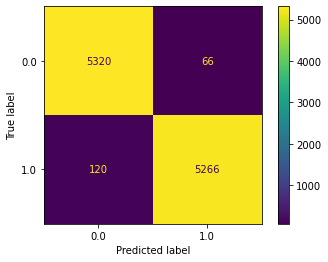

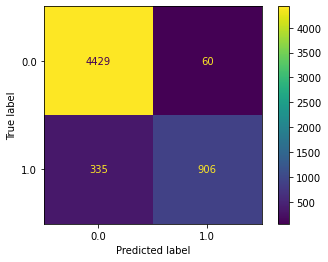

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

RForest_opt.fit(X_train,y_train)
RForest_opt_pred = RForest_opt.predict(X_test)
RForest_opt_pred2 = RForest_opt.predict(X_val)

cm = confusion_matrix(y_test, RForest_opt_pred, labels=RForest_opt.classes_)
cm2 = confusion_matrix(y_val, RForest_opt_pred2, labels=RForest_opt.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=RForest_opt.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=RForest_opt.classes_)
disp.plot()
disp2.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,RForest_opt_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      5386
         1.0       0.99      0.98      0.98      5386

    accuracy                           0.98     10772
   macro avg       0.98      0.98      0.98     10772
weighted avg       0.98      0.98      0.98     10772



## HGB

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED = 42
np.random.seed(SEED)

parameter_space = {
    'max_depth' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_bins' : [128, 214, 255], #randint(32,128),
    'max_leaf_nodes' :  randint(2,40),
    'learning_rate': [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
    'min_samples_leaf' : randint(2,20),
    'max_iter': [100, 150, 200]
}


busca = RandomizedSearchCV(HistGradientBoostingClassifier(),
                     parameter_space,
                     n_iter = 500,
                     cv = KFold(n_splits=5, shuffle=True),
                     random_state=SEED)

busca.fit(X_train_test_norm, y_train_test) #shoul've used train_test one..? 

results = pd.DataFrame(busca.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_bins,param_max_depth,param_max_iter,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.196306,0.040125,0.009138,0.001516,1,128,100,100,22,8,"{'learning_rate': 1, 'max_bins': 128, 'max_dep...",0.875366,0.881214,0.893469,0.889987,0.883844,0.884776,0.006401,332
1,1.654412,1.099227,0.059662,0.002617,0.1,255,60,200,12,5,"{'learning_rate': 0.1, 'max_bins': 255, 'max_d...",0.879404,0.893051,0.880240,0.885810,0.881755,0.884052,0.005010,340
2,1.028520,0.016548,0.050155,0.005364,0.2,214,40,150,25,13,"{'learning_rate': 0.2, 'max_bins': 214, 'max_d...",0.928144,0.934689,0.931207,0.933714,0.932451,0.932041,0.002274,96
3,0.318320,0.060104,0.013986,0.002434,0.8,214,10,100,34,13,"{'learning_rate': 0.8, 'max_bins': 214, 'max_d...",0.931068,0.917839,0.899596,0.917699,0.915320,0.916305,0.010024,152
4,0.795542,0.013171,0.039915,0.001751,0.1,214,None,100,28,11,"{'learning_rate': 0.1, 'max_bins': 214, 'max_d...",0.885392,0.900989,0.888456,0.897786,0.892479,0.893020,0.005754,251


In [ ]:
busca.best_params_

{'learning_rate': 0.4,
 'max_bins': 214,
 'max_depth': 10,
 'max_iter': 200,
 'max_leaf_nodes': 38,
 'min_samples_leaf': 6}

In [ ]:
resultados_ordenados_pela_media = results.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.973 +-(0.005) {'learning_rate': 0.4, 'max_bins': 214, 'max_depth': 10, 'max_iter': 200, 'max_leaf_nodes': 38, 'min_samples_leaf': 6}
0.972 +-(0.007) {'learning_rate': 0.4, 'max_bins': 214, 'max_depth': 50, 'max_iter': 200, 'max_leaf_nodes': 38, 'min_samples_leaf': 2}
0.971 +-(0.003) {'learning_rate': 0.6, 'max_bins': 214, 'max_depth': 40, 'max_iter': 200, 'max_leaf_nodes': 37, 'min_samples_leaf': 16}
0.971 +-(0.004) {'learning_rate': 0.4, 'max_bins': 255, 'max_depth': 40, 'max_iter': 200, 'max_leaf_nodes': 32, 'min_samples_leaf': 11}
0.969 +-(0.004) {'learning_rate': 0.4, 'max_bins': 214, 'max_depth': 20, 'max_iter': 150, 'max_leaf_nodes': 39, 'min_samples_leaf': 11}


In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)
# HGB_opt = busca.best_estimator_
HGB_opt = HistGradientBoostingClassifier(learning_rate=0.4,
                                         max_bins=214,
                                         max_depth=10,
                                         max_iter=200,
                                         max_leaf_nodes=38,
                                         min_samples_leaf=6)

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(HGB_opt, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  97.35 %
STD:  0.0018
Interval with 95% of confidence [96.98, 97.71]


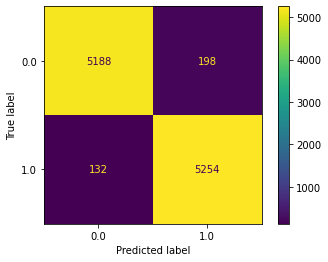

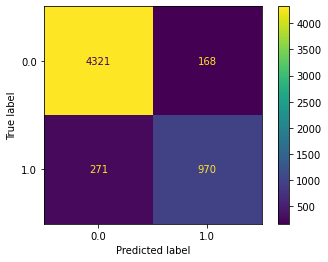

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

HGB_opt.fit(X_train,y_train)
HGB_opt_pred = HGB_opt.predict(X_test)
HGB_opt_pred2 = HGB_opt.predict(X_val)

cm = confusion_matrix(y_test, HGB_opt_pred, labels=HGB_opt.classes_)
cm2 = confusion_matrix(y_val, HGB_opt_pred2, labels=HGB_opt.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=HGB_opt.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=HGB_opt.classes_)
disp.plot()
disp2.plot()
plt.show()

## Bagging

In [17]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier
import time

SEED = 42
np.random.seed(SEED)

parameter_space = {
    # 'max_samples' : [1, 2, 3, 4, 5],
    'max_features' : [1, 2,  4, 6, 8, 10, 12], # randint(32,128),
    'bootstrap': [True, False],
    'n_estimators': [10, 20,  50 , 100, 200, 400, 600, 800, 1000] #, 1200, 1400, 1600, 1800, 2000],
}


tic = time.time()

busca = RandomizedSearchCV(BaggingClassifier(),
                     parameter_space,
                     n_iter = 100,
                     random_state=SEED,
                     cv = KFold(n_splits=5, shuffle=True),
                     )

busca.fit(X_train_test_norm, y_train_test)

tac = time.time()
elapsed_time = tac-tic 
print('Time: %.2f seconds' % elapsed_time)

results = pd.DataFrame(busca.cv_results_)
results.head()

Time: 5522.64 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.162831,0.039955,0.013171,0.001650,20,2,False,"{'n_estimators': 20, 'max_features': 2, 'boots...",0.706587,0.810611,0.805598,0.837488,0.804318,0.792920,0.044818,97
1,0.330908,0.045794,0.021887,0.001149,20,4,True,"{'n_estimators': 20, 'max_features': 4, 'boots...",0.931486,0.944994,0.923827,0.897786,0.924234,0.924465,0.015382,67
2,64.477143,1.347727,1.553286,0.014265,1000,10,False,"{'n_estimators': 1000, 'max_features': 10, 'bo...",0.983428,0.987328,0.985239,0.985100,0.985655,0.985350,0.001247,7
3,1.153548,0.109844,0.093614,0.004636,200,1,False,"{'n_estimators': 200, 'max_features': 1, 'boot...",0.842083,0.842223,0.848211,0.843754,0.825070,0.840268,0.007916,94
4,6.920306,0.260932,0.266976,0.005156,200,6,False,"{'n_estimators': 200, 'max_features': 6, 'boot...",0.970756,0.973681,0.972288,0.971731,0.973816,0.972454,0.001166,41


In [18]:
busca.best_params_

{'n_estimators': 400, 'max_features': 12, 'bootstrap': False}

In [19]:
resultados_ordenados_pela_media = results.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.986 +-(0.002) {'n_estimators': 400, 'max_features': 12, 'bootstrap': False}
0.986 +-(0.001) {'n_estimators': 800, 'max_features': 12, 'bootstrap': False}
0.986 +-(0.002) {'n_estimators': 200, 'max_features': 12, 'bootstrap': False}
0.986 +-(0.002) {'n_estimators': 600, 'max_features': 12, 'bootstrap': False}
0.986 +-(0.002) {'n_estimators': 100, 'max_features': 12, 'bootstrap': False}


In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)

bag_opt = BaggingClassifier(n_estimators=400,
                          max_features=12,
                          bootstrap=False)

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(bag_opt, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  98.69 %
STD:  0.0012
Interval with 95% of confidence [98.44, 98.94]


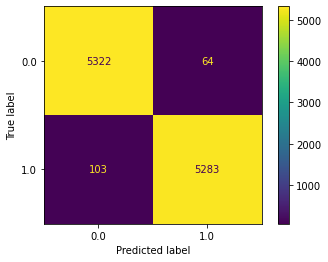

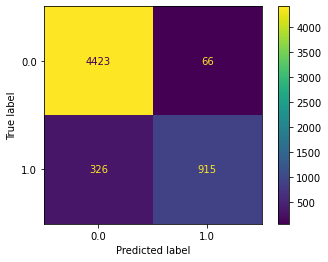

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

bag_opt.fit(X_train,y_train)
bag_opt_pred = bag_opt.predict(X_test)
bag_opt_pred2 = bag_opt.predict(X_val)

cm = confusion_matrix(y_test, bag_opt_pred, labels=bag_opt.classes_)
cm2 = confusion_matrix(y_val, bag_opt_pred2, labels=bag_opt.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=bag_opt.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=bag_opt.classes_)
disp.plot()
disp2.plot()
plt.show()

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,bag_opt_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      5386
         1.0       0.99      0.98      0.98      5386

    accuracy                           0.98     10772
   macro avg       0.98      0.98      0.98     10772
weighted avg       0.98      0.98      0.98     10772



## Voting (RF + HGB + Bagging) - Optimized

In [59]:
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_validate, KFold

SEED = 42
np.random.seed(SEED)
# HGB_vot = HistGradientBoostingClassifier()
# rf_vot = RandomForestClassifier()
# bag_vot = BaggingClassifier()

voting_opt = VotingClassifier(estimators=[('rf', RForest_opt), ('hgb', HGB_opt), ('bag',bag_opt)], 
                          voting='soft')

cv=KFold(n_splits=5, shuffle=True) # usa shuffle TRUE pra embaralhar os dados antes de dividir em pedaços qdo não for time series


results = cross_validate(voting_opt, X_train_test_norm, y_train_test, cv = cv, return_train_score=False) # CV número de partes em que vai dividir

mean = results['test_score'].mean()
std = results['test_score'].std()

# media +- 2*std =  95% de confiança

print("Accuracy with cross validation, 5 folds:\n")
print('Mean Accuracy: ', np.round((mean)*100,2),'%')
print('STD: ', np.round(std,4))
print('Interval with 95%% of confidence [%.2f, %.2f]' % ((mean - 2 *std) * 100, (mean + 2 * std) * 100))

Accuracy with cross validation, 5 folds:

Mean Accuracy:  98.72 %
STD:  0.0018
Interval with 95% of confidence [98.35, 99.08]


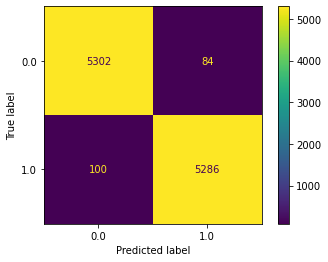

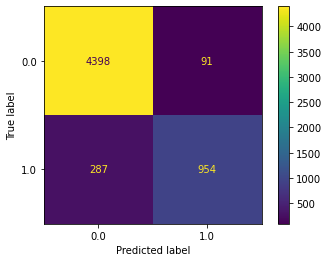

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

voting_opt.fit(X_train,y_train)
voting_opt_pred = voting_opt.predict(X_test)
voting_opt_pred2 = voting_opt.predict(X_val)

cm = confusion_matrix(y_test, voting_opt_pred, labels=voting_opt.classes_)
cm2 = confusion_matrix(y_val, voting_opt_pred2, labels=voting_opt.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=voting_opt.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=voting_opt.classes_)
disp.plot()
disp2.plot()
plt.show()

# Evaluating Voting Approach - Before and After Optmization

## Confusion Matrix

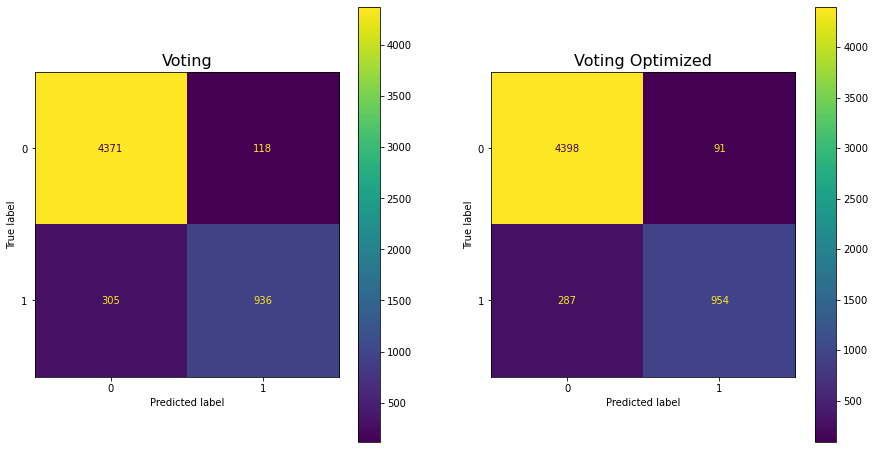

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1)
ax.set_title('Voting', fontsize=16)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Voting Optimized', fontsize=16)


voting_pred_val = voting.predict(X_val)
voting_opt_pred_val = voting_opt.predict(X_val)

cm = confusion_matrix(y_val, voting_pred_val, labels=np.array([0,1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=np.array([0,1]))

cm2 = confusion_matrix(y_val, voting_opt_pred_val, labels=np.array([0,1]))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=np.array([0,1]))


disp.plot(ax=ax)
disp2.plot(ax=ax2)
plt.show()

## Classification Metrics

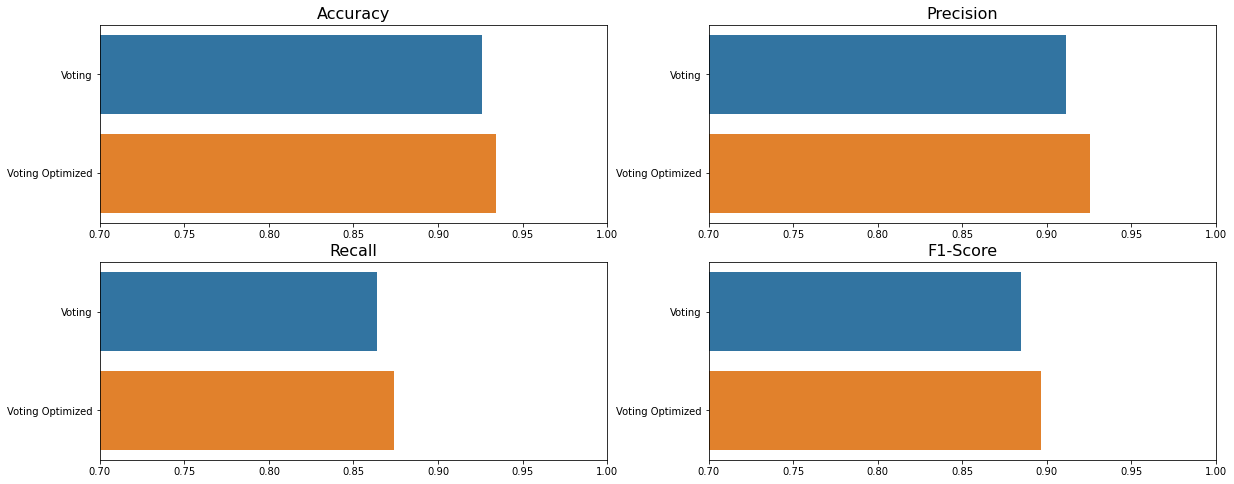

In [72]:
def get_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).T
    # df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

def insert_value_df2(df, metric, method1, method2):
  dic = {'Metric': metric, 
         'Voting':method1, 
         'Voting Optimized':method2}
  df = df.append(dic, ignore_index=True)
  return df

voting_metrics = get_classification_report(y_val,voting_pred_val)
voting_opt_metrics = get_classification_report(y_val,voting_opt_pred_val)

metrics2 = pd.DataFrame(columns=['Metric', 'Voting', 'Voting Optimized'])
metrics2 = insert_value_df2(metrics2,'Accuracy',
                          voting_metrics.loc['accuracy']['f1-score'],
                          voting_opt_metrics.loc['accuracy']['f1-score'])

metrics2 = insert_value_df2(metrics2,'Precision',
                          voting_metrics.loc['macro avg']['precision'],
                          voting_opt_metrics.loc['macro avg']['precision'])

metrics2 = insert_value_df2(metrics2,'Recall',
                          voting_metrics.loc['macro avg']['recall'],
                          voting_opt_metrics.loc['macro avg']['recall'])

metrics2 = insert_value_df2(metrics2,'F1-score',
                          voting_metrics.loc['macro avg']['f1-score'],
                          voting_opt_metrics.loc['macro avg']['f1-score'])

metrics2 = metrics2.set_index('Metric')
metrics2 = metrics2.T

plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.xlim(0.7,1)
sns.barplot(data = metrics2, y= metrics2.index, x='Accuracy')
plt.title('Accuracy', fontsize=16)
plt.xlabel('')

plt.subplot(2,2,2)
plt.xlim(0.7,1)
sns.barplot(data = metrics2, y= metrics2.index, x='Precision')
plt.title('Precision', fontsize=16)
plt.xlabel('')

plt.subplot(2,2,3)
plt.xlim(0.7,1)
sns.barplot(data = metrics2, y= metrics2.index, x='Recall')
plt.title('Recall', fontsize=16)
plt.xlabel('')

plt.subplot(2,2,4)
plt.xlim(0.7,1)
sns.barplot(data = metrics2, y= metrics2.index, x='F1-score')
plt.title('F1-Score', fontsize=16)
plt.xlabel('')

# plt.show()

plt.savefig('voting_compare.png')




## ROC Curve


ROC AUC score:
Voting (RF+HGB+Bag) =	 0.939350716560438
Voting OPT (RF+HGB+Bag) =	 0.9438608011094898


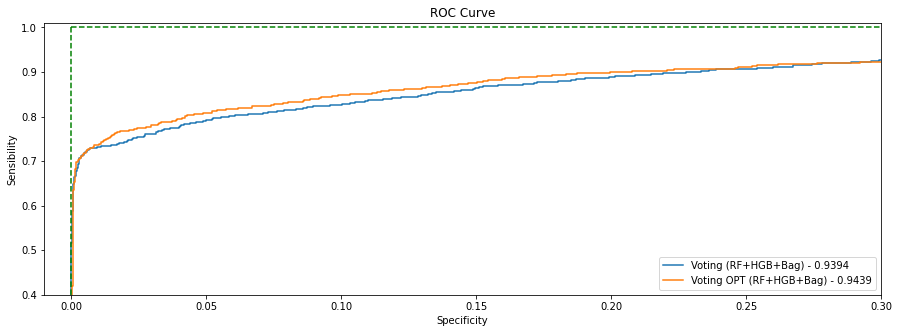

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

voting_pred = voting.predict_proba(X_val)[:,1]
voting_opt_pred = voting_opt.predict_proba(X_val)[:,1]


# tfp - taxa de falsos positivos
# tvp - taxa de verdadeiros positivos


print('ROC AUC score:')

voting_tfp, voting_tvp, limite = roc_curve(y_val, voting_pred)
print('Voting (RF+HGB+Bag) =\t', roc_auc_score(y_val, voting_pred))

voting_opt_tfp, voting_opt_tvp, limite = roc_curve(y_val, voting_opt_pred)
print('Voting OPT (RF+HGB+Bag) =\t', roc_auc_score(y_val, voting_opt_pred))

plt.subplots(1, figsize=(15,5))
plt.title('ROC Curve')
plt.plot(voting_tfp, voting_tvp)
plt.plot(voting_opt_tfp, voting_opt_tvp)
plt.legend([f'Voting (RF+HGB+Bag) - {np.round(roc_auc_score(y_val, voting_pred),4)}',
            f'Voting OPT (RF+HGB+Bag) - {np.round(roc_auc_score(y_val, voting_opt_pred),4)}'])
plt.xlabel('Specificity')
plt.ylabel('Sensibility')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.xlim(-0.01,0.3)
plt.ylim(0.4,1.01)

plt.savefig('roc_voting_compare.png')

# Saving Models

In [80]:
def save_model(model,name):
    import pickle
    arquivo = name + '.pkl'
    with open(arquivo,'wb') as file:
        pickle.dump(model,file)
    print('Model sklearn saved: ',name)

def load_model(name):
    import pickle
    arquivo = name + '.pkl'
    with open(arquivo,'rb') as file:
        model = pickle.load(file)
    print('Model sklearn loaded')
    return model

# Saving Random Forest optmz

save_model(RForest_opt,'RandomForest_Opt')

# Saving HGB optmz

save_model(HGB_opt,'HGB_opt')

# Saving Bagging optmz

save_model(bag_opt,'Bagging_Opt')

# Saving Voting (RF + HGB + Bagging) optmz

save_model(voting_opt,'Voting_Opt')


Model sklearn saved:  RandomForest_Opt
Model sklearn saved:  HGB_opt
Model sklearn saved:  Bagging_Opt
Model sklearn saved:  Voting_Opt
